In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import  Counter
import pickle
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
spam_df = pd.read_csv('/content/drive/MyDrive/Email_SMS_SpamDetection/Email_SMS_SpamDetection_Dataset/spam.csv',encoding='latin-1')

In [ ]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
spam_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis =1,inplace = True)

In [ ]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_df.rename(columns={"v1": "result","v2": "listed data"}, inplace = True)

In [ ]:
spam_df.head()

,result,listed data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_df['result'].value_counts()

ham     4825
spam     747
Name: result, dtype: int64

In [ ]:
spam_df.shape

(5572, 2)

In [ ]:
spam_df.duplicated().sum()

403

In [ ]:
spam_df.drop_duplicates(keep = 'first',inplace = True)
spam_df

,result,listed data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


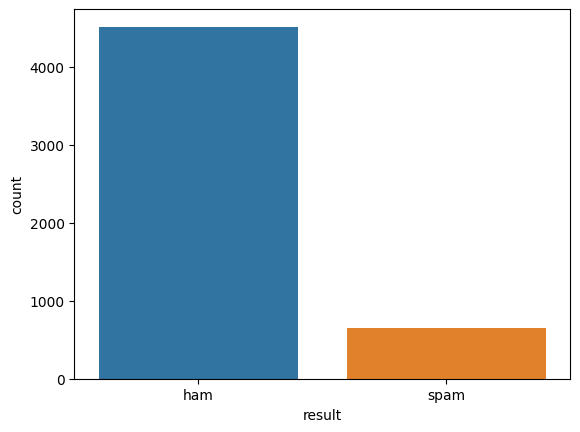

In [ ]:
sns.countplot(x='result', data=spam_df)
plt.show()

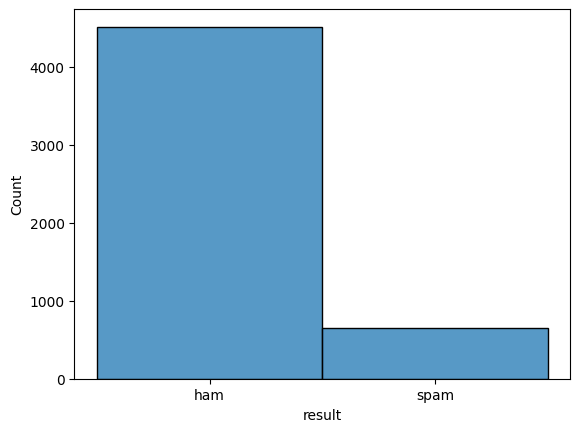

In [ ]:
sns.histplot(x='result', data=spam_df)
plt.show()

In [ ]:
XY = LabelEncoder()
spam_df["result"] = XY.fit_transform(spam_df["result"])
spam_df['result'].value_counts()

0    4516
1     653
Name: result, dtype: int64

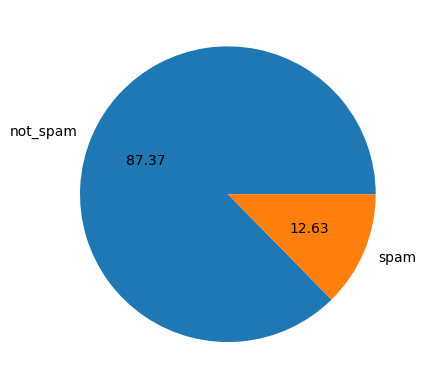

In [ ]:
plt.pie(spam_df["result"].value_counts(),autopct = "%.2f", labels=['not_spam','spam'])
plt.show()

**Determining the total number of characters, Words and Sentence present in the data**

In [ ]:
spam_df["characters"] = spam_df["listed data"].apply(len)

spam_df["word"] = spam_df["listed data"].apply(lambda x:len( nltk.word_tokenize(x)))

spam_df["sentence"] = spam_df["listed data"].apply(lambda x:len(nltk.sent_tokenize(x)))
spam_df

,result,listed data,characters,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


**Data Visualisation**

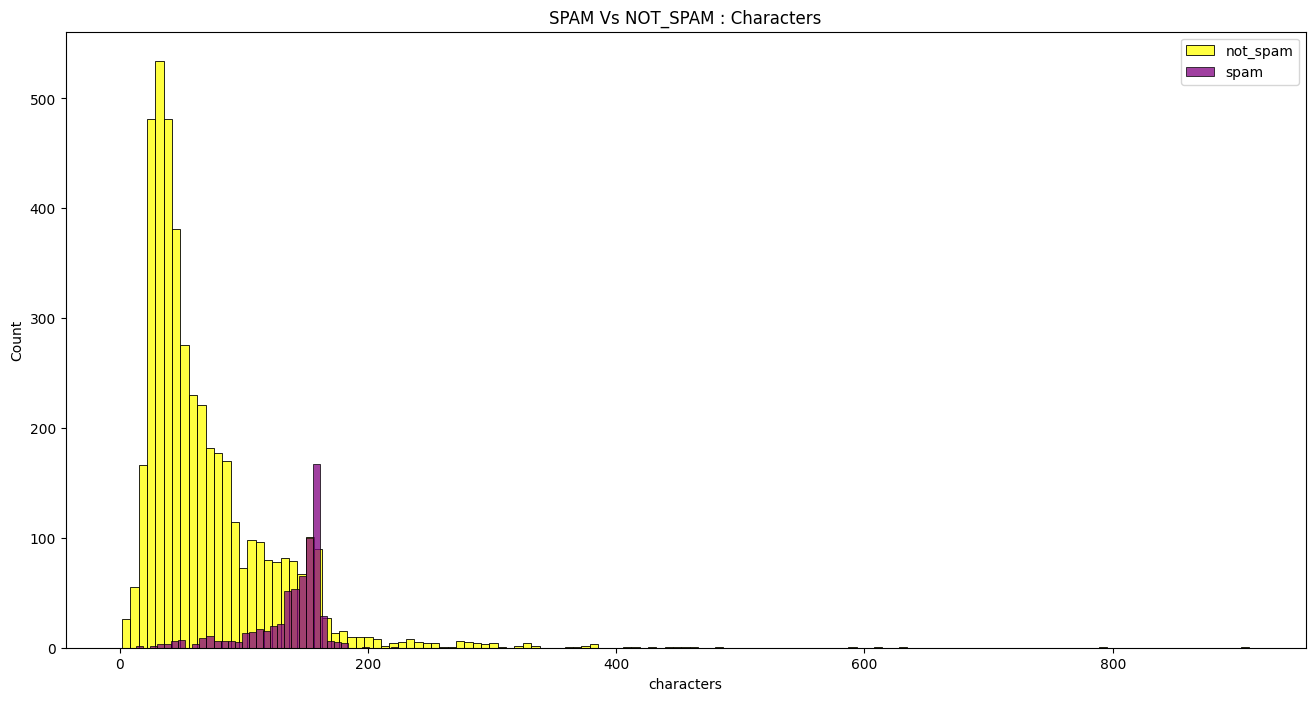

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(spam_df[spam_df["result"]==0]["characters"],label= "not_spam",color="yellow")
sns.histplot(spam_df[spam_df["result"]==1]["characters"],label= "spam",color = "purple")
plt.title("SPAM Vs NOT_SPAM : Characters")
plt.legend()
plt.show()

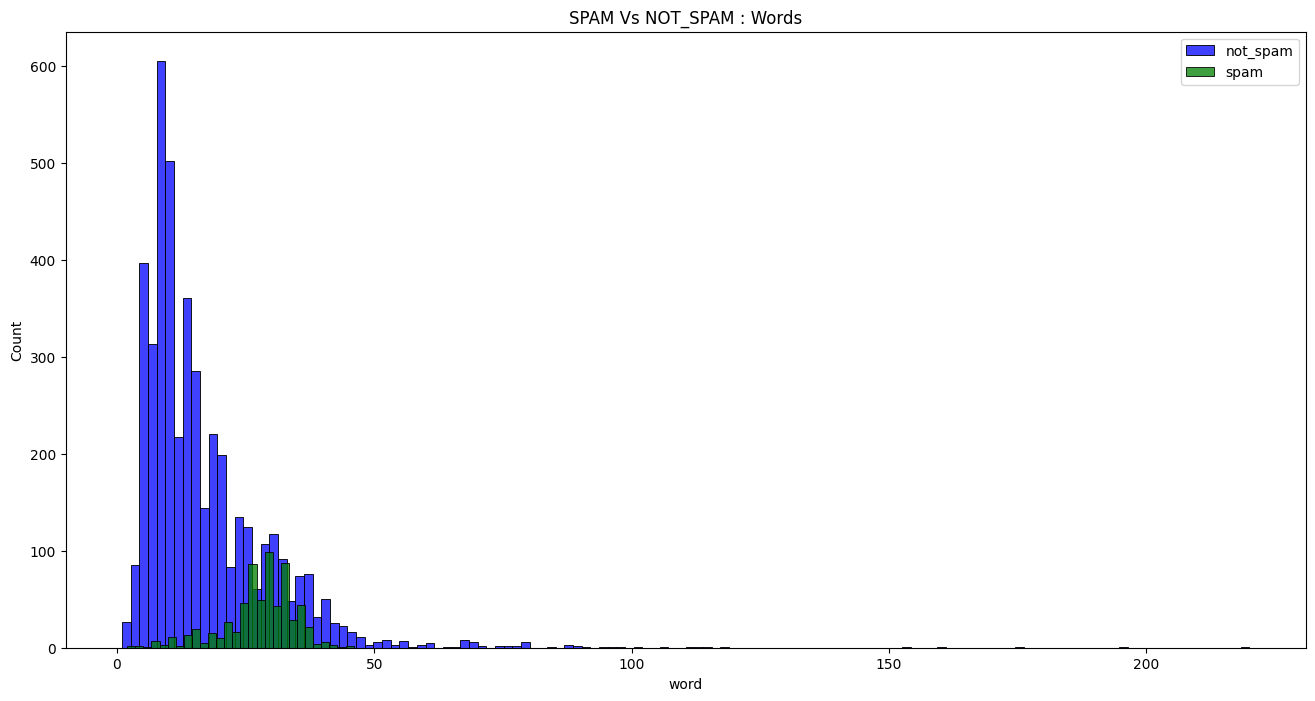

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(spam_df[spam_df["result"]==0]["word"],label= "not_spam",color="blue")
sns.histplot(spam_df[spam_df["result"]==1]["word"],label= "spam",color = "green")
plt.title("SPAM Vs NOT_SPAM : Words")
plt.legend()
plt.show()

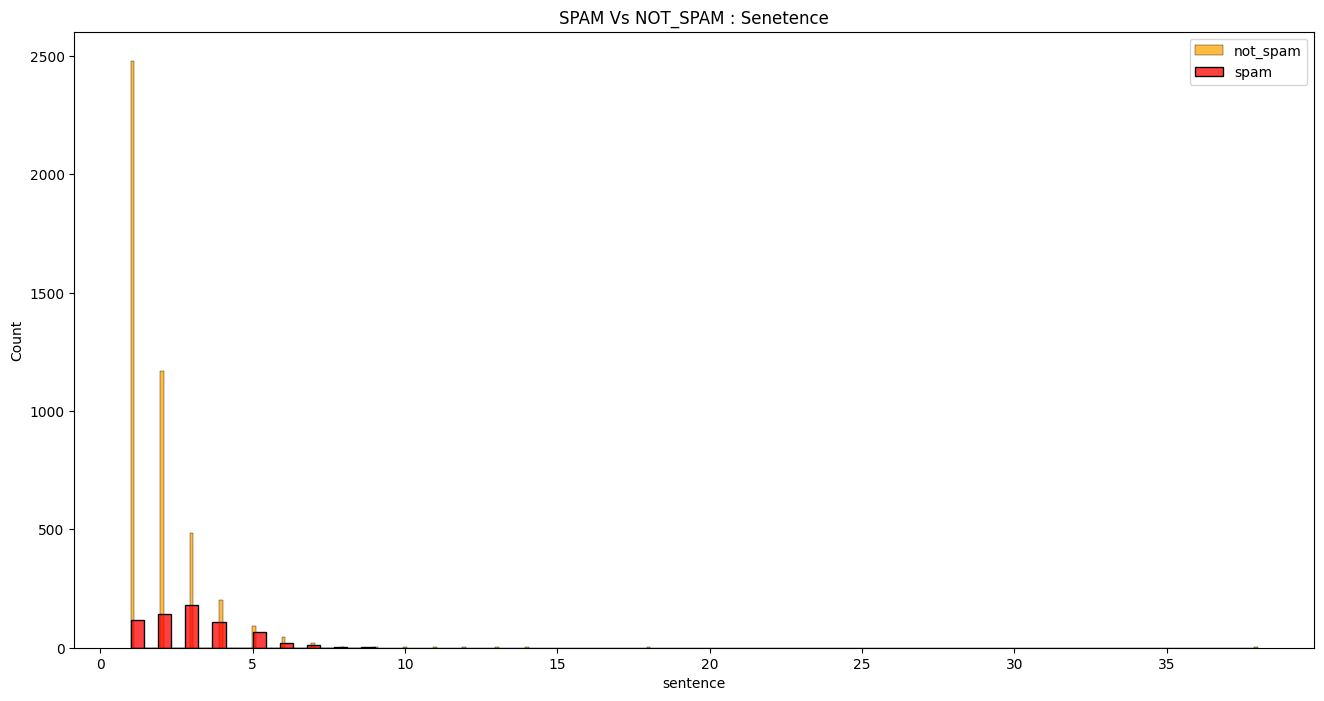

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(spam_df[spam_df["result"]==0]["sentence"],label= "not_spam",color="orange")
sns.histplot(spam_df[spam_df["result"]==1]["sentence"],label= "spam",color = "red")
plt.title("SPAM Vs NOT_SPAM : Senetence")
plt.legend()
plt.show()

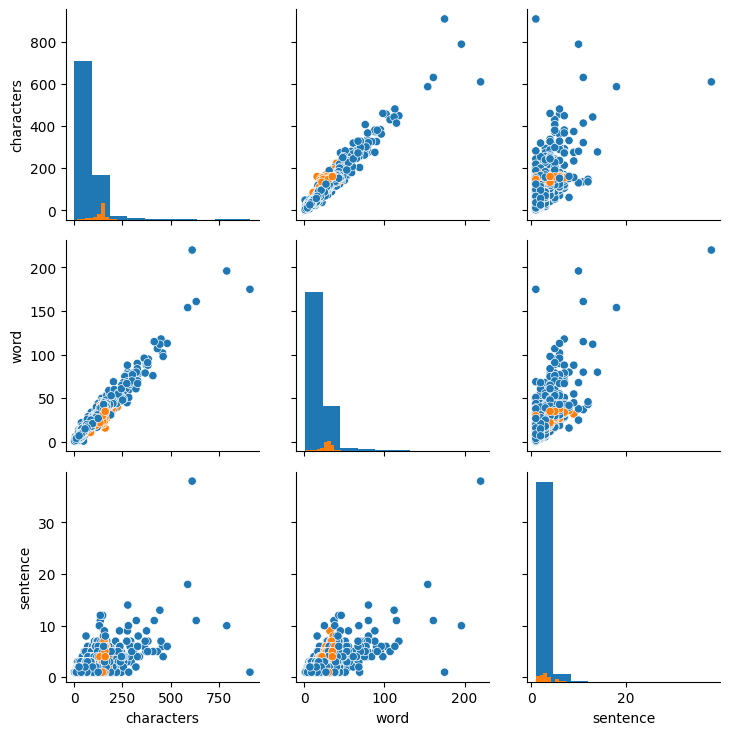

In [ ]:
g = sns.PairGrid(spam_df,hue="result")
g.map_upper(sns.scatterplot,color='orange')
g.map_lower(sns.scatterplot,color='blue')
g.map_diag(plt.hist)

<Axes: >

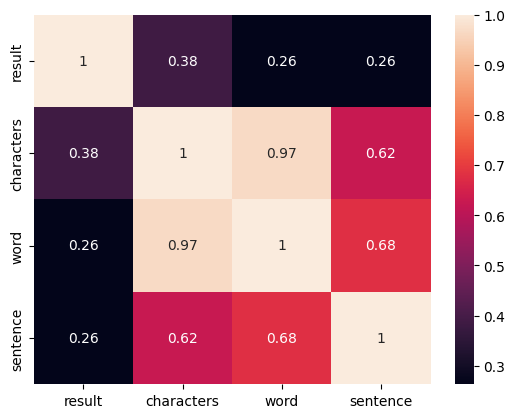

In [ ]:
corr=spam_df.corr()
sns.heatmap(spam_df.corr(),annot = True)

Data Preprocessing
This step includes lowercasing the text, punctuation removal and stopwords too, stemming and removal of special charaters as well!!!



In [ ]:
spam_df['listed data'] = spam_df['listed data'].str.lower().str.replace('[^\w\s]', '')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
spam_df['new_listed data'] = spam_df['listed data'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
spam_df

,result,listed data,characters,word,sentence,new_listed data
0,0,go until jurong point crazy available only in ...,111,24,2,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni,29,8,2,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say early hor u c already say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think goes usf lives around though
...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u u å750 pound prize ...
5568,0,will ì_ b going to esplanade fr home,37,9,1,ì_ b going esplanade fr home
5569,0,pity was in mood for that soany other suggest...,57,15,2,pity mood soany suggestions
5570,0,the guy did some bitching but i acted like id ...,125,27,1,guy bitching acted like id interested buying s...


In [ ]:
wc = WordCloud(
    background_color='white',
    width=600,
    height=300
)

Generating **spam** and **not_spam** data from **WordCloud** using the listed data

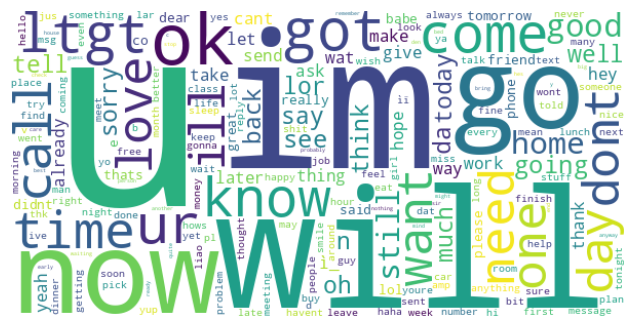

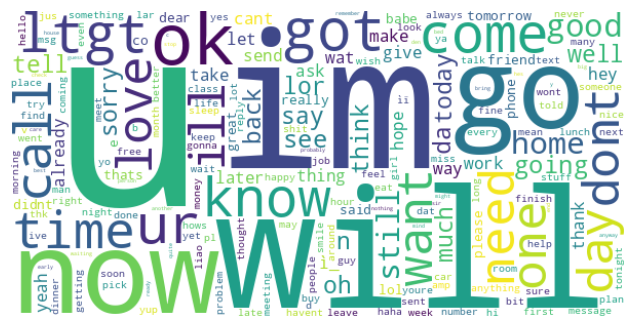

In [ ]:
spam_wc = wc.generate(spam_df[spam_df["result"] ==1]["listed data"].str.cat(sep=" "))

not_spam_wc = wc.generate(spam_df[spam_df["result"] ==0]["listed data"].str.cat(sep=" "))

plt.figure(figsize=(8, 4))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(not_spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Generating **Spam** and **Not_spam** data from **WordCloud** using the new listed data

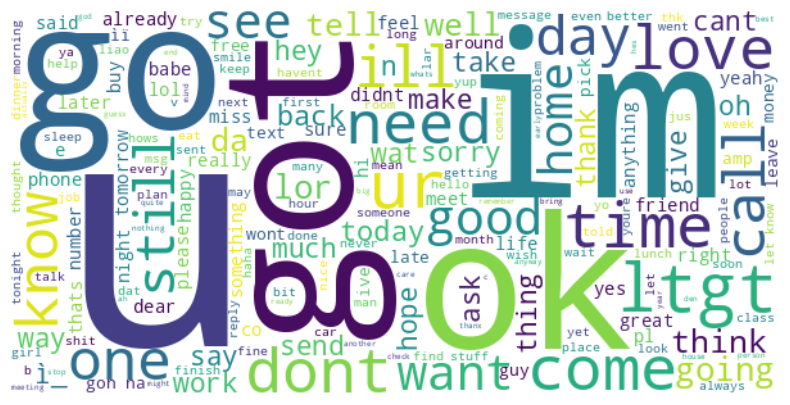

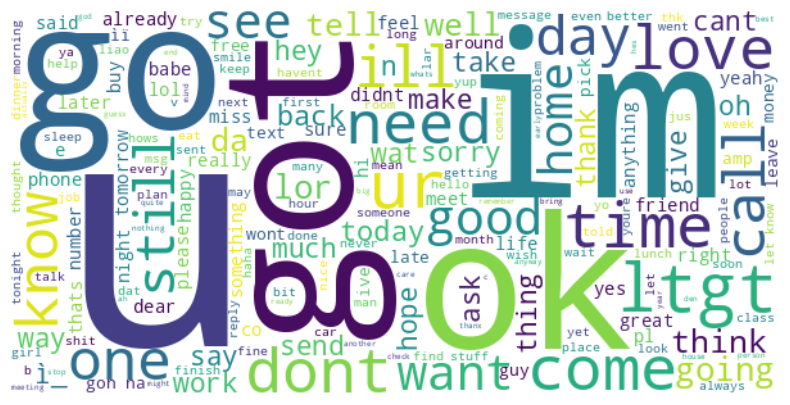

In [ ]:
spam_wc1 = wc.generate(spam_df[spam_df["result"] ==1]["new_listed data"].str.cat(sep=" "))

not_spam_wc1 = wc.generate(spam_df[spam_df["result"] ==0]["new_listed data"].str.cat(sep=" "))

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(not_spam_wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
spam_collection = []
for msg in spam_df[spam_df["result"]==1]["listed data"].tolist():
    for word in msg.split():
        spam_collection.append(word)

# Spliting HAM Sentences in Words
not_spam_collection = []
for msg in spam_df[spam_df['result'] == 0]['listed data'].tolist():
    for word in msg.split():
        not_spam_collection.append(word)

Collecting Top 60 spam words and not_spam words from collection of WordCloud

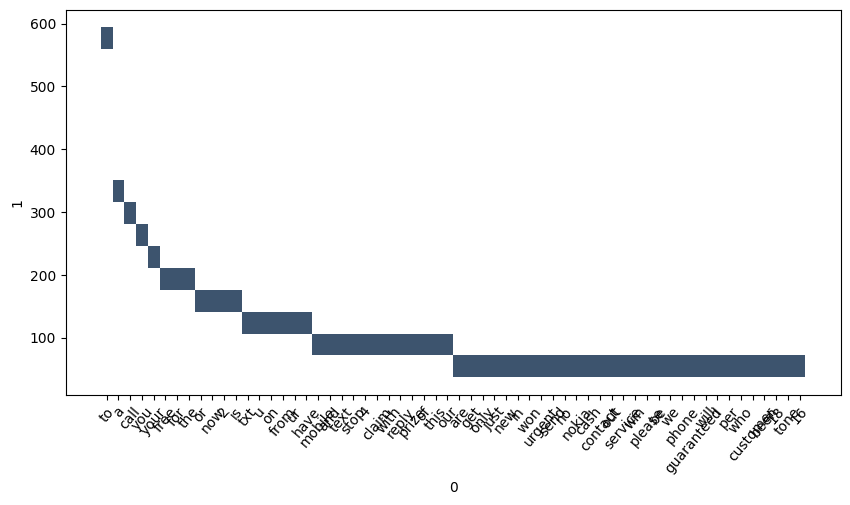

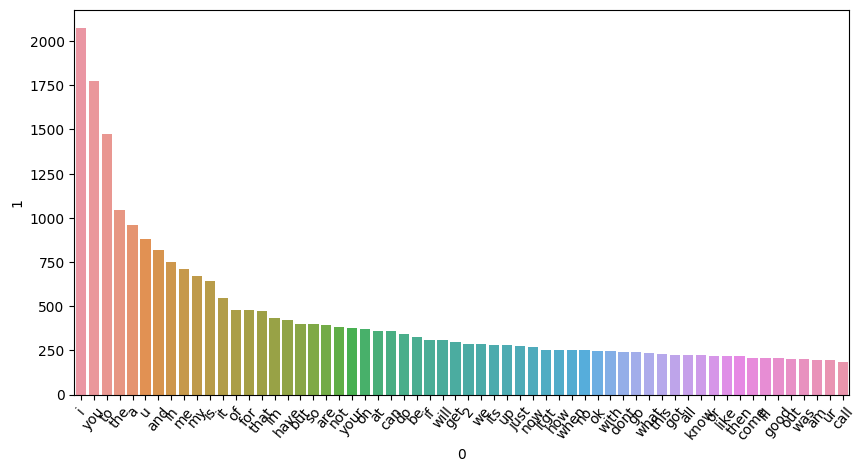

In [ ]:
a=pd.DataFrame(Counter(spam_collection).most_common(60))[0]
b=pd.DataFrame(Counter(spam_collection).most_common(60))[1]
plt.figure(figsize=(10,5))
sns.histplot(x= a,y=b)
plt.xticks(rotation=50)
plt.show()


a=pd.DataFrame(Counter(not_spam_collection).most_common(60))[0]
b=pd.DataFrame(Counter(not_spam_collection).most_common(60))[1]
plt.figure(figsize=(10,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=50)
plt.show()

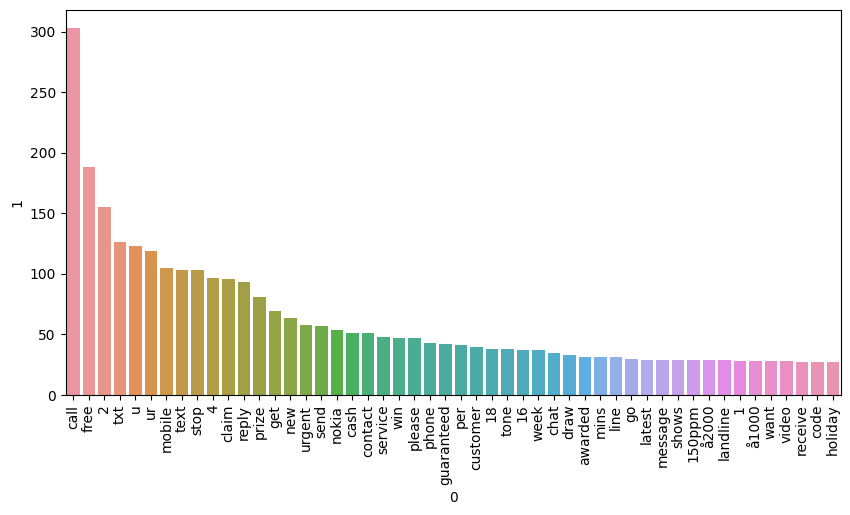

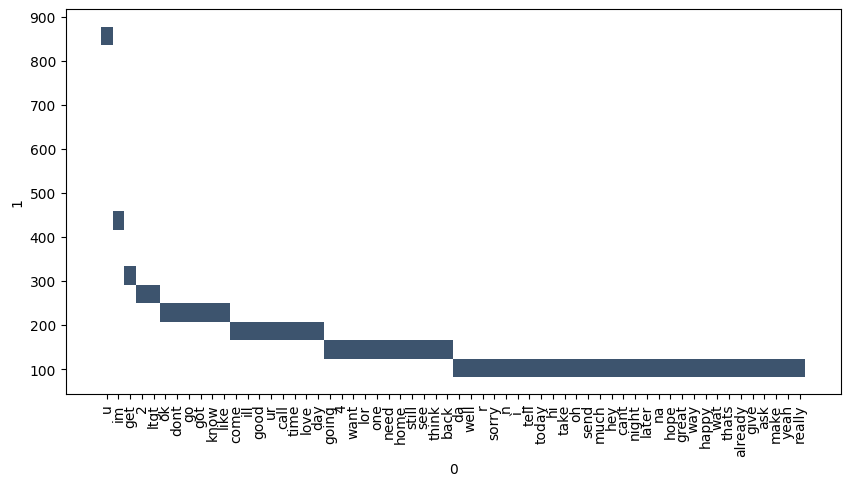

In [ ]:
spam_collection = []
for msg in spam_df[spam_df["result"]==1]["new_listed data"].tolist():
    for word in msg.split():
        spam_collection.append(word)

not_spam_collection = []
for msg in spam_df[spam_df['result'] == 0]['new_listed data'].tolist():
    for word in msg.split():
        not_spam_collection.append(word)

a=pd.DataFrame(Counter(spam_collection).most_common(50))[0]
b=pd.DataFrame(Counter(spam_collection).most_common(50))[1]
plt.figure(figsize=(10,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)
plt.show()

a=pd.DataFrame(Counter(not_spam_collection).most_common(60))[0]
b=pd.DataFrame(Counter(not_spam_collection).most_common(60))[1]
plt.figure(figsize=(10,5))
sns.histplot(x= a,y=b)
plt.xticks(rotation=90)
plt.show()


**Model Building**

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
spam_df

,result,listed data,characters,word,sentence,new_listed data
0,0,go until jurong point crazy available only in ...,111,24,2,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni,29,8,2,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say so early hor u c already then say,49,13,1,u dun say early hor u c already say
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,nah dont think goes usf lives around though
...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u u å750 pound prize ...
5568,0,will ì_ b going to esplanade fr home,37,9,1,ì_ b going esplanade fr home
5569,0,pity was in mood for that soany other suggest...,57,15,2,pity mood soany suggestions
5570,0,the guy did some bitching but i acted like id ...,125,27,1,guy bitching acted like id interested buying s...


In [ ]:
X = tfidf.fit_transform(spam_df['new_listed data']).toarray()

In [ ]:
X.shape

(5169, 9399)

In [ ]:
y = spam_df['result'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

**Splitting into Trainning and Testing Dataset**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9013539651837524
[[812  84]
 [ 18 120]]
0.5882352941176471


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9516441005802708
[[896   0]
 [ 50  88]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
mnb = MultinomialNB()

In [ ]:
classifications = {'SVC' : svc, 'NB' : mnb, 'LR' : lrc}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.9739130434782609)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in classifications.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  NB
Accuracy -  0.9516441005802708
Precision -  1.0
For  LR
Accuracy -  0.941972920696325
Precision -  0.9148936170212766


In [ ]:
performance_spam_df = pd.DataFrame({'Algorithm':classifications.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_spam_df1 = pd.melt(performance_spam_df, id_vars = "Algorithm")

In [ ]:
performance_spam_df1

,Algorithm,variable,value
0,NB,Accuracy,0.951644
1,SVC,Accuracy,0.971954
2,LR,Accuracy,0.941973
3,NB,Precision,1.000000
4,SVC,Precision,0.973913
5,LR,Precision,0.914894


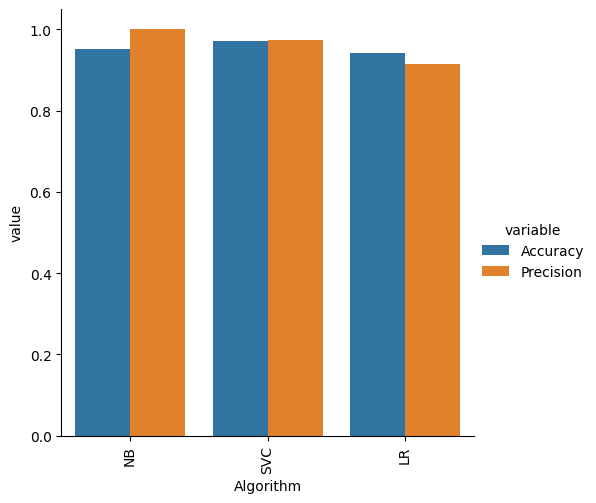

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_spam_df1, kind = 'bar',height=5)
plt.xticks(rotation='vertical')
plt.show()